In [1]:
import argparse, os
from pathlib import Path

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import pickle
import numpy as np
from utils import Vocabulary, Custom_Flickr30k, collate_fn
from models import EncoderCNN, DecoderRNNwithAttention
from beam import print_beam_outputs


In [2]:
vocab = pickle.load(open('vocab.p', 'rb'))
NUM_WORKERS = 4
CROP_SIZE = 256
NUM_PIXELS = 64
ENCODER_SIZE = 2048

val_transform = transforms.Compose([
            transforms.CenterCrop(CROP_SIZE),
            transforms.ToTensor(),
            transforms.Normalize((0.444, 0.421, 0.385),
                                 (0.285, 0.277, 0.286))])
val_loader = torch.utils.data.DataLoader(
            dataset=Custom_Flickr30k('./flickr30k-images','./flickr30k-captions/results_20130124.token', vocab, transform=val_transform, train=False),
            batch_size=16,
            shuffle=False,
            num_workers=NUM_WORKERS,
            collate_fn=collate_fn)

In [9]:
encoder = EncoderCNN() 
decoder = DecoderRNNwithAttention(len(vocab), 512, 1, 512, ENCODER_SIZE, NUM_PIXELS, 0.5)   
model = torch.load('better_model.pth.tar', map_location=torch.device('cpu')) 
encoder.load_state_dict(model['encoder']) 
decoder.load_state_dict(model['decoder']) 

RuntimeError: Error(s) in loading state_dict for EncoderCNN:
	Unexpected key(s) in state_dict: "resnet.5.4.conv1.weight", "resnet.5.4.bn1.weight", "resnet.5.4.bn1.bias", "resnet.5.4.bn1.running_mean", "resnet.5.4.bn1.running_var", "resnet.5.4.bn1.num_batches_tracked", "resnet.5.4.conv2.weight", "resnet.5.4.bn2.weight", "resnet.5.4.bn2.bias", "resnet.5.4.bn2.running_mean", "resnet.5.4.bn2.running_var", "resnet.5.4.bn2.num_batches_tracked", "resnet.5.4.conv3.weight", "resnet.5.4.bn3.weight", "resnet.5.4.bn3.bias", "resnet.5.4.bn3.running_mean", "resnet.5.4.bn3.running_var", "resnet.5.4.bn3.num_batches_tracked", "resnet.5.5.conv1.weight", "resnet.5.5.bn1.weight", "resnet.5.5.bn1.bias", "resnet.5.5.bn1.running_mean", "resnet.5.5.bn1.running_var", "resnet.5.5.bn1.num_batches_tracked", "resnet.5.5.conv2.weight", "resnet.5.5.bn2.weight", "resnet.5.5.bn2.bias", "resnet.5.5.bn2.running_mean", "resnet.5.5.bn2.running_var", "resnet.5.5.bn2.num_batches_tracked", "resnet.5.5.conv3.weight", "resnet.5.5.bn3.weight", "resnet.5.5.bn3.bias", "resnet.5.5.bn3.running_mean", "resnet.5.5.bn3.running_var", "resnet.5.5.bn3.num_batches_tracked", "resnet.5.6.conv1.weight", "resnet.5.6.bn1.weight", "resnet.5.6.bn1.bias", "resnet.5.6.bn1.running_mean", "resnet.5.6.bn1.running_var", "resnet.5.6.bn1.num_batches_tracked", "resnet.5.6.conv2.weight", "resnet.5.6.bn2.weight", "resnet.5.6.bn2.bias", "resnet.5.6.bn2.running_mean", "resnet.5.6.bn2.running_var", "resnet.5.6.bn2.num_batches_tracked", "resnet.5.6.conv3.weight", "resnet.5.6.bn3.weight", "resnet.5.6.bn3.bias", "resnet.5.6.bn3.running_mean", "resnet.5.6.bn3.running_var", "resnet.5.6.bn3.num_batches_tracked", "resnet.5.7.conv1.weight", "resnet.5.7.bn1.weight", "resnet.5.7.bn1.bias", "resnet.5.7.bn1.running_mean", "resnet.5.7.bn1.running_var", "resnet.5.7.bn1.num_batches_tracked", "resnet.5.7.conv2.weight", "resnet.5.7.bn2.weight", "resnet.5.7.bn2.bias", "resnet.5.7.bn2.running_mean", "resnet.5.7.bn2.running_var", "resnet.5.7.bn2.num_batches_tracked", "resnet.5.7.conv3.weight", "resnet.5.7.bn3.weight", "resnet.5.7.bn3.bias", "resnet.5.7.bn3.running_mean", "resnet.5.7.bn3.running_var", "resnet.5.7.bn3.num_batches_tracked", "resnet.6.6.conv1.weight", "resnet.6.6.bn1.weight", "resnet.6.6.bn1.bias", "resnet.6.6.bn1.running_mean", "resnet.6.6.bn1.running_var", "resnet.6.6.bn1.num_batches_tracked", "resnet.6.6.conv2.weight", "resnet.6.6.bn2.weight", "resnet.6.6.bn2.bias", "resnet.6.6.bn2.running_mean", "resnet.6.6.bn2.running_var", "resnet.6.6.bn2.num_batches_tracked", "resnet.6.6.conv3.weight", "resnet.6.6.bn3.weight", "resnet.6.6.bn3.bias", "resnet.6.6.bn3.running_mean", "resnet.6.6.bn3.running_var", "resnet.6.6.bn3.num_batches_tracked", "resnet.6.7.conv1.weight", "resnet.6.7.bn1.weight", "resnet.6.7.bn1.bias", "resnet.6.7.bn1.running_mean", "resnet.6.7.bn1.running_var", "resnet.6.7.bn1.num_batches_tracked", "resnet.6.7.conv2.weight", "resnet.6.7.bn2.weight", "resnet.6.7.bn2.bias", "resnet.6.7.bn2.running_mean", "resnet.6.7.bn2.running_var", "resnet.6.7.bn2.num_batches_tracked", "resnet.6.7.conv3.weight", "resnet.6.7.bn3.weight", "resnet.6.7.bn3.bias", "resnet.6.7.bn3.running_mean", "resnet.6.7.bn3.running_var", "resnet.6.7.bn3.num_batches_tracked", "resnet.6.8.conv1.weight", "resnet.6.8.bn1.weight", "resnet.6.8.bn1.bias", "resnet.6.8.bn1.running_mean", "resnet.6.8.bn1.running_var", "resnet.6.8.bn1.num_batches_tracked", "resnet.6.8.conv2.weight", "resnet.6.8.bn2.weight", "resnet.6.8.bn2.bias", "resnet.6.8.bn2.running_mean", "resnet.6.8.bn2.running_var", "resnet.6.8.bn2.num_batches_tracked", "resnet.6.8.conv3.weight", "resnet.6.8.bn3.weight", "resnet.6.8.bn3.bias", "resnet.6.8.bn3.running_mean", "resnet.6.8.bn3.running_var", "resnet.6.8.bn3.num_batches_tracked", "resnet.6.9.conv1.weight", "resnet.6.9.bn1.weight", "resnet.6.9.bn1.bias", "resnet.6.9.bn1.running_mean", "resnet.6.9.bn1.running_var", "resnet.6.9.bn1.num_batches_tracked", "resnet.6.9.conv2.weight", "resnet.6.9.bn2.weight", "resnet.6.9.bn2.bias", "resnet.6.9.bn2.running_mean", "resnet.6.9.bn2.running_var", "resnet.6.9.bn2.num_batches_tracked", "resnet.6.9.conv3.weight", "resnet.6.9.bn3.weight", "resnet.6.9.bn3.bias", "resnet.6.9.bn3.running_mean", "resnet.6.9.bn3.running_var", "resnet.6.9.bn3.num_batches_tracked", "resnet.6.10.conv1.weight", "resnet.6.10.bn1.weight", "resnet.6.10.bn1.bias", "resnet.6.10.bn1.running_mean", "resnet.6.10.bn1.running_var", "resnet.6.10.bn1.num_batches_tracked", "resnet.6.10.conv2.weight", "resnet.6.10.bn2.weight", "resnet.6.10.bn2.bias", "resnet.6.10.bn2.running_mean", "resnet.6.10.bn2.running_var", "resnet.6.10.bn2.num_batches_tracked", "resnet.6.10.conv3.weight", "resnet.6.10.bn3.weight", "resnet.6.10.bn3.bias", "resnet.6.10.bn3.running_mean", "resnet.6.10.bn3.running_var", "resnet.6.10.bn3.num_batches_tracked", "resnet.6.11.conv1.weight", "resnet.6.11.bn1.weight", "resnet.6.11.bn1.bias", "resnet.6.11.bn1.running_mean", "resnet.6.11.bn1.running_var", "resnet.6.11.bn1.num_batches_tracked", "resnet.6.11.conv2.weight", "resnet.6.11.bn2.weight", "resnet.6.11.bn2.bias", "resnet.6.11.bn2.running_mean", "resnet.6.11.bn2.running_var", "resnet.6.11.bn2.num_batches_tracked", "resnet.6.11.conv3.weight", "resnet.6.11.bn3.weight", "resnet.6.11.bn3.bias", "resnet.6.11.bn3.running_mean", "resnet.6.11.bn3.running_var", "resnet.6.11.bn3.num_batches_tracked", "resnet.6.12.conv1.weight", "resnet.6.12.bn1.weight", "resnet.6.12.bn1.bias", "resnet.6.12.bn1.running_mean", "resnet.6.12.bn1.running_var", "resnet.6.12.bn1.num_batches_tracked", "resnet.6.12.conv2.weight", "resnet.6.12.bn2.weight", "resnet.6.12.bn2.bias", "resnet.6.12.bn2.running_mean", "resnet.6.12.bn2.running_var", "resnet.6.12.bn2.num_batches_tracked", "resnet.6.12.conv3.weight", "resnet.6.12.bn3.weight", "resnet.6.12.bn3.bias", "resnet.6.12.bn3.running_mean", "resnet.6.12.bn3.running_var", "resnet.6.12.bn3.num_batches_tracked", "resnet.6.13.conv1.weight", "resnet.6.13.bn1.weight", "resnet.6.13.bn1.bias", "resnet.6.13.bn1.running_mean", "resnet.6.13.bn1.running_var", "resnet.6.13.bn1.num_batches_tracked", "resnet.6.13.conv2.weight", "resnet.6.13.bn2.weight", "resnet.6.13.bn2.bias", "resnet.6.13.bn2.running_mean", "resnet.6.13.bn2.running_var", "resnet.6.13.bn2.num_batches_tracked", "resnet.6.13.conv3.weight", "resnet.6.13.bn3.weight", "resnet.6.13.bn3.bias", "resnet.6.13.bn3.running_mean", "resnet.6.13.bn3.running_var", "resnet.6.13.bn3.num_batches_tracked", "resnet.6.14.conv1.weight", "resnet.6.14.bn1.weight", "resnet.6.14.bn1.bias", "resnet.6.14.bn1.running_mean", "resnet.6.14.bn1.running_var", "resnet.6.14.bn1.num_batches_tracked", "resnet.6.14.conv2.weight", "resnet.6.14.bn2.weight", "resnet.6.14.bn2.bias", "resnet.6.14.bn2.running_mean", "resnet.6.14.bn2.running_var", "resnet.6.14.bn2.num_batches_tracked", "resnet.6.14.conv3.weight", "resnet.6.14.bn3.weight", "resnet.6.14.bn3.bias", "resnet.6.14.bn3.running_mean", "resnet.6.14.bn3.running_var", "resnet.6.14.bn3.num_batches_tracked", "resnet.6.15.conv1.weight", "resnet.6.15.bn1.weight", "resnet.6.15.bn1.bias", "resnet.6.15.bn1.running_mean", "resnet.6.15.bn1.running_var", "resnet.6.15.bn1.num_batches_tracked", "resnet.6.15.conv2.weight", "resnet.6.15.bn2.weight", "resnet.6.15.bn2.bias", "resnet.6.15.bn2.running_mean", "resnet.6.15.bn2.running_var", "resnet.6.15.bn2.num_batches_tracked", "resnet.6.15.conv3.weight", "resnet.6.15.bn3.weight", "resnet.6.15.bn3.bias", "resnet.6.15.bn3.running_mean", "resnet.6.15.bn3.running_var", "resnet.6.15.bn3.num_batches_tracked", "resnet.6.16.conv1.weight", "resnet.6.16.bn1.weight", "resnet.6.16.bn1.bias", "resnet.6.16.bn1.running_mean", "resnet.6.16.bn1.running_var", "resnet.6.16.bn1.num_batches_tracked", "resnet.6.16.conv2.weight", "resnet.6.16.bn2.weight", "resnet.6.16.bn2.bias", "resnet.6.16.bn2.running_mean", "resnet.6.16.bn2.running_var", "resnet.6.16.bn2.num_batches_tracked", "resnet.6.16.conv3.weight", "resnet.6.16.bn3.weight", "resnet.6.16.bn3.bias", "resnet.6.16.bn3.running_mean", "resnet.6.16.bn3.running_var", "resnet.6.16.bn3.num_batches_tracked", "resnet.6.17.conv1.weight", "resnet.6.17.bn1.weight", "resnet.6.17.bn1.bias", "resnet.6.17.bn1.running_mean", "resnet.6.17.bn1.running_var", "resnet.6.17.bn1.num_batches_tracked", "resnet.6.17.conv2.weight", "resnet.6.17.bn2.weight", "resnet.6.17.bn2.bias", "resnet.6.17.bn2.running_mean", "resnet.6.17.bn2.running_var", "resnet.6.17.bn2.num_batches_tracked", "resnet.6.17.conv3.weight", "resnet.6.17.bn3.weight", "resnet.6.17.bn3.bias", "resnet.6.17.bn3.running_mean", "resnet.6.17.bn3.running_var", "resnet.6.17.bn3.num_batches_tracked", "resnet.6.18.conv1.weight", "resnet.6.18.bn1.weight", "resnet.6.18.bn1.bias", "resnet.6.18.bn1.running_mean", "resnet.6.18.bn1.running_var", "resnet.6.18.bn1.num_batches_tracked", "resnet.6.18.conv2.weight", "resnet.6.18.bn2.weight", "resnet.6.18.bn2.bias", "resnet.6.18.bn2.running_mean", "resnet.6.18.bn2.running_var", "resnet.6.18.bn2.num_batches_tracked", "resnet.6.18.conv3.weight", "resnet.6.18.bn3.weight", "resnet.6.18.bn3.bias", "resnet.6.18.bn3.running_mean", "resnet.6.18.bn3.running_var", "resnet.6.18.bn3.num_batches_tracked", "resnet.6.19.conv1.weight", "resnet.6.19.bn1.weight", "resnet.6.19.bn1.bias", "resnet.6.19.bn1.running_mean", "resnet.6.19.bn1.running_var", "resnet.6.19.bn1.num_batches_tracked", "resnet.6.19.conv2.weight", "resnet.6.19.bn2.weight", "resnet.6.19.bn2.bias", "resnet.6.19.bn2.running_mean", "resnet.6.19.bn2.running_var", "resnet.6.19.bn2.num_batches_tracked", "resnet.6.19.conv3.weight", "resnet.6.19.bn3.weight", "resnet.6.19.bn3.bias", "resnet.6.19.bn3.running_mean", "resnet.6.19.bn3.running_var", "resnet.6.19.bn3.num_batches_tracked", "resnet.6.20.conv1.weight", "resnet.6.20.bn1.weight", "resnet.6.20.bn1.bias", "resnet.6.20.bn1.running_mean", "resnet.6.20.bn1.running_var", "resnet.6.20.bn1.num_batches_tracked", "resnet.6.20.conv2.weight", "resnet.6.20.bn2.weight", "resnet.6.20.bn2.bias", "resnet.6.20.bn2.running_mean", "resnet.6.20.bn2.running_var", "resnet.6.20.bn2.num_batches_tracked", "resnet.6.20.conv3.weight", "resnet.6.20.bn3.weight", "resnet.6.20.bn3.bias", "resnet.6.20.bn3.running_mean", "resnet.6.20.bn3.running_var", "resnet.6.20.bn3.num_batches_tracked", "resnet.6.21.conv1.weight", "resnet.6.21.bn1.weight", "resnet.6.21.bn1.bias", "resnet.6.21.bn1.running_mean", "resnet.6.21.bn1.running_var", "resnet.6.21.bn1.num_batches_tracked", "resnet.6.21.conv2.weight", "resnet.6.21.bn2.weight", "resnet.6.21.bn2.bias", "resnet.6.21.bn2.running_mean", "resnet.6.21.bn2.running_var", "resnet.6.21.bn2.num_batches_tracked", "resnet.6.21.conv3.weight", "resnet.6.21.bn3.weight", "resnet.6.21.bn3.bias", "resnet.6.21.bn3.running_mean", "resnet.6.21.bn3.running_var", "resnet.6.21.bn3.num_batches_tracked", "resnet.6.22.conv1.weight", "resnet.6.22.bn1.weight", "resnet.6.22.bn1.bias", "resnet.6.22.bn1.running_mean", "resnet.6.22.bn1.running_var", "resnet.6.22.bn1.num_batches_tracked", "resnet.6.22.conv2.weight", "resnet.6.22.bn2.weight", "resnet.6.22.bn2.bias", "resnet.6.22.bn2.running_mean", "resnet.6.22.bn2.running_var", "resnet.6.22.bn2.num_batches_tracked", "resnet.6.22.conv3.weight", "resnet.6.22.bn3.weight", "resnet.6.22.bn3.bias", "resnet.6.22.bn3.running_mean", "resnet.6.22.bn3.running_var", "resnet.6.22.bn3.num_batches_tracked", "resnet.6.23.conv1.weight", "resnet.6.23.bn1.weight", "resnet.6.23.bn1.bias", "resnet.6.23.bn1.running_mean", "resnet.6.23.bn1.running_var", "resnet.6.23.bn1.num_batches_tracked", "resnet.6.23.conv2.weight", "resnet.6.23.bn2.weight", "resnet.6.23.bn2.bias", "resnet.6.23.bn2.running_mean", "resnet.6.23.bn2.running_var", "resnet.6.23.bn2.num_batches_tracked", "resnet.6.23.conv3.weight", "resnet.6.23.bn3.weight", "resnet.6.23.bn3.bias", "resnet.6.23.bn3.running_mean", "resnet.6.23.bn3.running_var", "resnet.6.23.bn3.num_batches_tracked", "resnet.6.24.conv1.weight", "resnet.6.24.bn1.weight", "resnet.6.24.bn1.bias", "resnet.6.24.bn1.running_mean", "resnet.6.24.bn1.running_var", "resnet.6.24.bn1.num_batches_tracked", "resnet.6.24.conv2.weight", "resnet.6.24.bn2.weight", "resnet.6.24.bn2.bias", "resnet.6.24.bn2.running_mean", "resnet.6.24.bn2.running_var", "resnet.6.24.bn2.num_batches_tracked", "resnet.6.24.conv3.weight", "resnet.6.24.bn3.weight", "resnet.6.24.bn3.bias", "resnet.6.24.bn3.running_mean", "resnet.6.24.bn3.running_var", "resnet.6.24.bn3.num_batches_tracked", "resnet.6.25.conv1.weight", "resnet.6.25.bn1.weight", "resnet.6.25.bn1.bias", "resnet.6.25.bn1.running_mean", "resnet.6.25.bn1.running_var", "resnet.6.25.bn1.num_batches_tracked", "resnet.6.25.conv2.weight", "resnet.6.25.bn2.weight", "resnet.6.25.bn2.bias", "resnet.6.25.bn2.running_mean", "resnet.6.25.bn2.running_var", "resnet.6.25.bn2.num_batches_tracked", "resnet.6.25.conv3.weight", "resnet.6.25.bn3.weight", "resnet.6.25.bn3.bias", "resnet.6.25.bn3.running_mean", "resnet.6.25.bn3.running_var", "resnet.6.25.bn3.num_batches_tracked", "resnet.6.26.conv1.weight", "resnet.6.26.bn1.weight", "resnet.6.26.bn1.bias", "resnet.6.26.bn1.running_mean", "resnet.6.26.bn1.running_var", "resnet.6.26.bn1.num_batches_tracked", "resnet.6.26.conv2.weight", "resnet.6.26.bn2.weight", "resnet.6.26.bn2.bias", "resnet.6.26.bn2.running_mean", "resnet.6.26.bn2.running_var", "resnet.6.26.bn2.num_batches_tracked", "resnet.6.26.conv3.weight", "resnet.6.26.bn3.weight", "resnet.6.26.bn3.bias", "resnet.6.26.bn3.running_mean", "resnet.6.26.bn3.running_var", "resnet.6.26.bn3.num_batches_tracked", "resnet.6.27.conv1.weight", "resnet.6.27.bn1.weight", "resnet.6.27.bn1.bias", "resnet.6.27.bn1.running_mean", "resnet.6.27.bn1.running_var", "resnet.6.27.bn1.num_batches_tracked", "resnet.6.27.conv2.weight", "resnet.6.27.bn2.weight", "resnet.6.27.bn2.bias", "resnet.6.27.bn2.running_mean", "resnet.6.27.bn2.running_var", "resnet.6.27.bn2.num_batches_tracked", "resnet.6.27.conv3.weight", "resnet.6.27.bn3.weight", "resnet.6.27.bn3.bias", "resnet.6.27.bn3.running_mean", "resnet.6.27.bn3.running_var", "resnet.6.27.bn3.num_batches_tracked", "resnet.6.28.conv1.weight", "resnet.6.28.bn1.weight", "resnet.6.28.bn1.bias", "resnet.6.28.bn1.running_mean", "resnet.6.28.bn1.running_var", "resnet.6.28.bn1.num_batches_tracked", "resnet.6.28.conv2.weight", "resnet.6.28.bn2.weight", "resnet.6.28.bn2.bias", "resnet.6.28.bn2.running_mean", "resnet.6.28.bn2.running_var", "resnet.6.28.bn2.num_batches_tracked", "resnet.6.28.conv3.weight", "resnet.6.28.bn3.weight", "resnet.6.28.bn3.bias", "resnet.6.28.bn3.running_mean", "resnet.6.28.bn3.running_var", "resnet.6.28.bn3.num_batches_tracked", "resnet.6.29.conv1.weight", "resnet.6.29.bn1.weight", "resnet.6.29.bn1.bias", "resnet.6.29.bn1.running_mean", "resnet.6.29.bn1.running_var", "resnet.6.29.bn1.num_batches_tracked", "resnet.6.29.conv2.weight", "resnet.6.29.bn2.weight", "resnet.6.29.bn2.bias", "resnet.6.29.bn2.running_mean", "resnet.6.29.bn2.running_var", "resnet.6.29.bn2.num_batches_tracked", "resnet.6.29.conv3.weight", "resnet.6.29.bn3.weight", "resnet.6.29.bn3.bias", "resnet.6.29.bn3.running_mean", "resnet.6.29.bn3.running_var", "resnet.6.29.bn3.num_batches_tracked", "resnet.6.30.conv1.weight", "resnet.6.30.bn1.weight", "resnet.6.30.bn1.bias", "resnet.6.30.bn1.running_mean", "resnet.6.30.bn1.running_var", "resnet.6.30.bn1.num_batches_tracked", "resnet.6.30.conv2.weight", "resnet.6.30.bn2.weight", "resnet.6.30.bn2.bias", "resnet.6.30.bn2.running_mean", "resnet.6.30.bn2.running_var", "resnet.6.30.bn2.num_batches_tracked", "resnet.6.30.conv3.weight", "resnet.6.30.bn3.weight", "resnet.6.30.bn3.bias", "resnet.6.30.bn3.running_mean", "resnet.6.30.bn3.running_var", "resnet.6.30.bn3.num_batches_tracked", "resnet.6.31.conv1.weight", "resnet.6.31.bn1.weight", "resnet.6.31.bn1.bias", "resnet.6.31.bn1.running_mean", "resnet.6.31.bn1.running_var", "resnet.6.31.bn1.num_batches_tracked", "resnet.6.31.conv2.weight", "resnet.6.31.bn2.weight", "resnet.6.31.bn2.bias", "resnet.6.31.bn2.running_mean", "resnet.6.31.bn2.running_var", "resnet.6.31.bn2.num_batches_tracked", "resnet.6.31.conv3.weight", "resnet.6.31.bn3.weight", "resnet.6.31.bn3.bias", "resnet.6.31.bn3.running_mean", "resnet.6.31.bn3.running_var", "resnet.6.31.bn3.num_batches_tracked", "resnet.6.32.conv1.weight", "resnet.6.32.bn1.weight", "resnet.6.32.bn1.bias", "resnet.6.32.bn1.running_mean", "resnet.6.32.bn1.running_var", "resnet.6.32.bn1.num_batches_tracked", "resnet.6.32.conv2.weight", "resnet.6.32.bn2.weight", "resnet.6.32.bn2.bias", "resnet.6.32.bn2.running_mean", "resnet.6.32.bn2.running_var", "resnet.6.32.bn2.num_batches_tracked", "resnet.6.32.conv3.weight", "resnet.6.32.bn3.weight", "resnet.6.32.bn3.bias", "resnet.6.32.bn3.running_mean", "resnet.6.32.bn3.running_var", "resnet.6.32.bn3.num_batches_tracked", "resnet.6.33.conv1.weight", "resnet.6.33.bn1.weight", "resnet.6.33.bn1.bias", "resnet.6.33.bn1.running_mean", "resnet.6.33.bn1.running_var", "resnet.6.33.bn1.num_batches_tracked", "resnet.6.33.conv2.weight", "resnet.6.33.bn2.weight", "resnet.6.33.bn2.bias", "resnet.6.33.bn2.running_mean", "resnet.6.33.bn2.running_var", "resnet.6.33.bn2.num_batches_tracked", "resnet.6.33.conv3.weight", "resnet.6.33.bn3.weight", "resnet.6.33.bn3.bias", "resnet.6.33.bn3.running_mean", "resnet.6.33.bn3.running_var", "resnet.6.33.bn3.num_batches_tracked", "resnet.6.34.conv1.weight", "resnet.6.34.bn1.weight", "resnet.6.34.bn1.bias", "resnet.6.34.bn1.running_mean", "resnet.6.34.bn1.running_var", "resnet.6.34.bn1.num_batches_tracked", "resnet.6.34.conv2.weight", "resnet.6.34.bn2.weight", "resnet.6.34.bn2.bias", "resnet.6.34.bn2.running_mean", "resnet.6.34.bn2.running_var", "resnet.6.34.bn2.num_batches_tracked", "resnet.6.34.conv3.weight", "resnet.6.34.bn3.weight", "resnet.6.34.bn3.bias", "resnet.6.34.bn3.running_mean", "resnet.6.34.bn3.running_var", "resnet.6.34.bn3.num_batches_tracked", "resnet.6.35.conv1.weight", "resnet.6.35.bn1.weight", "resnet.6.35.bn1.bias", "resnet.6.35.bn1.running_mean", "resnet.6.35.bn1.running_var", "resnet.6.35.bn1.num_batches_tracked", "resnet.6.35.conv2.weight", "resnet.6.35.bn2.weight", "resnet.6.35.bn2.bias", "resnet.6.35.bn2.running_mean", "resnet.6.35.bn2.running_var", "resnet.6.35.bn2.num_batches_tracked", "resnet.6.35.conv3.weight", "resnet.6.35.bn3.weight", "resnet.6.35.bn3.bias", "resnet.6.35.bn3.running_mean", "resnet.6.35.bn3.running_var", "resnet.6.35.bn3.num_batches_tracked". 

In [4]:
# obtain a batch of sample features, images, and captions
features = None
imgs = None
caps = None
for i, (images, captions, lengths) in enumerate(val_loader):
    if i > 0:
        break
    features = encoder(images)
    imgs = images
    caps = captions

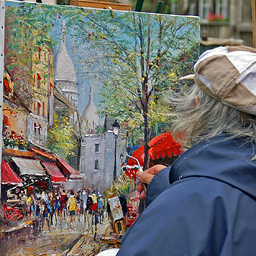

Target Captions:
a person with long gray hair has a beret with beige and white wearing a blue raincoat is painting a marketplace scenery surrounded by other artists and <unk>
a person dressed in a blue coat is standing in on a busy sidewalk studying painting of a street scene
a person with gray hair is painting in a public place surrounded by others who are also painting
lady in blue coat with white and brown hat standing in front of a painting
<unk> admiring painting at an outdoor art fair

Predicted Captions:
<start> boat buried scuba spread sing mom statues catches hot unison plain party goal asia mall artist artist outstretched type backward
<start> boat buried scuba spread sing mom statues catches hot unison plain party goal asia mall artist artist outstretched type people
<start> boat buried scuba spread sing mom statues catches hot unison plain party goal asia mall artist artist outstretched artist bleachers


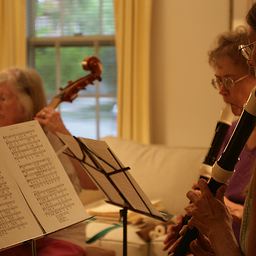

Target Captions:
two women both wearing glasses are playing <unk> and an elderly woman is playing a <unk> instrument
at least four <unk> play <unk> and other instruments in a <unk> room
four women in a living room three of which are <unk> playing a musical instrument
a bunch of elderly women play their <unk> together as they <unk> off sheet music
a group of four women are performing music on their instruments

Predicted Captions:
<start> hiding asking device mall party variety arrivo wading party party party party kicks chatting many observed found stall geese asia
<start> hiding asking device mall party variety arrivo wading party party party party kicks chatting many observed found stall geese spot
<start> hiding asking device mall party variety arrivo wading party party party party kicks chatting many observed found love eyeglasses carry


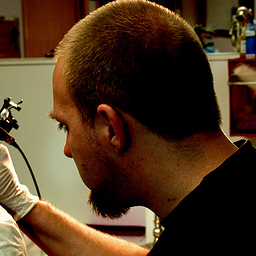

Target Captions:
a man with a <unk> in a black shirt and white <unk> gloves is using a tattoo gun to place a tattoo on someone 's back
a man is putting a tattoo on a another 's man upper back
a man with a black shirt giving another man a tattoo
a man is putting tattoo on his back
a man getting a tattoo on his back

Predicted Captions:
<start> hugs asians move chefs clearing bunny beside mural watch trampoline picture carry carry move beside nurse beside watch contains low
<start> hugs asians move chefs clearing bunny beside mural watch trampoline picture carry carry move beside nurse beside watch contains <end>
<start> hugs asians move chefs clearing bunny beside mural watch trampoline picture carry carry move beside nurse beside watch contains carry


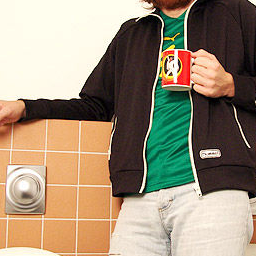

Target Captions:
a man with a baseball cap and black jacket stands in a <unk> while holding a coffee mug
a man is wearing a ball cap and holding a coffee cup between to <unk>
a man is posing next to a <unk> with a cup of coffee
a man holds a coffee cup while in the <unk>
a man standing at a <unk> with a coffee cup

Predicted Captions:
<start> streets carry admiring jogging carry waving shaving canal carry ball son gate chocolate move figure tricycle beside church bathing backdrop
<start> streets carry admiring jogging carry waving shaving canal carry ball son gate chocolate move figure tricycle beside church bathing laboratory
<start> streets carry admiring jogging carry waving shaving canal carry ball son gate chocolate move figure tricycle beside church bathing hot


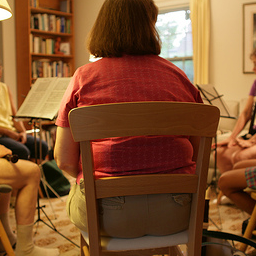

Target Captions:
a group of adults inside a home sitting on chairs <unk> in a circle playing a type of musical instruments
five musicians a man and four women practicing sheet music using <unk> in a living room
people gathered in a circle some holding musical instruments
people gathered in a room to talk about their <unk> <unk>
five people are sitting in a circle with instruments

Predicted Captions:
<start> boat mexican snowboarding projects pretending cars displays themselves leads checking balding clearing batman <start> mural strip trampoline away posed hip
<start> boat mexican snowboarding projects pretending cars displays themselves leads checking balding clearing batman <start> mural strip trampoline away pattern trampoline
<start> boat mexican snowboarding projects pretending cars displays themselves leads checking balding clearing batman <start> mural strip trampoline away pattern displays


In [6]:
## NOTE: generated captions here will be terrible as I used a mo
beams = decoder.beam_sample(features, imgs=images, targets = captions, beam_size=3)
print_beam_outputs(beams, vocab, num_to_print=5)